In [2]:
from time import sleep
import numpy as np
import pandas as pd
from scipy import stats
import statsmodels.api as sm
from pandas_datareader import data as wb
import quandl
quandl.ApiConfig.api_key = 'JgrixskwB3MtGDkJtxms'
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
# 1952: Harry Markowitz published paper formalizing the idea of a diversified portfolio
# Investors shouldn't put all of their eggs in one basket
# He proved the existence of an efficient set of portfolios
# Investors should understand the relationship between securities in their portfolios
# Need to understand how different securities in a portfolio interact with eash other.
# The combination of securities with little correlation allows investors to optimize their return
# without assuming additional risk
# Diversified Portfolio: Higher Returns no additional risk
# 

In [4]:
assets = ['PG','^GSPC']

In [5]:
pf_data =pd.DataFrame()

In [6]:
for a in assets:
    pf_data[a] = wb.DataReader(a, data_source='yahoo',start='2010-01-01')['Adj Close']

In [7]:
pf_data.tail()

,PG,^GSPC
Date,,
2017-10-19,91.589996,2562.100098
2017-10-20,88.250000,2575.209961
2017-10-23,87.300003,2564.979980
2017-10-24,86.980003,2569.129883
2017-10-25,86.349998,2548.419922


In [13]:
normalized = (pf_data/pf_data.iloc[0])*100

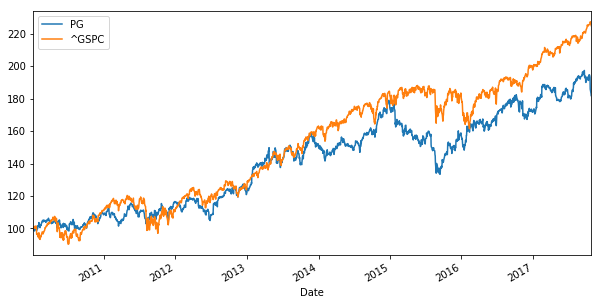

In [14]:
normalized.plot(figsize=(10,5));

In [15]:
log_returns = np.log(pf_data/pf_data.shift(1))

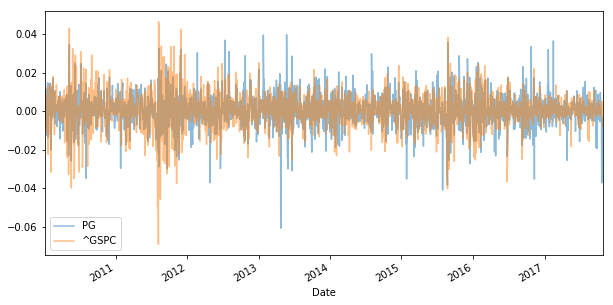

In [18]:
log_returns.plot(figsize=(10,5), alpha=0.5);

In [19]:
log_returns.mean() * 250

PG       0.076009
^GSPC    0.103027
dtype: float64

In [20]:
log_returns.cov() * 250

,PG,^GSPC
PG,0.019428,0.011645
^GSPC,0.011645,0.021987


In [26]:
log_returns.corr()

,PG,^GSPC
PG,1.000000,0.563451
^GSPC,0.563451,1.000000


In [21]:
num_assets = len(assets)

In [22]:
num_assets

2

In [23]:
arr = np.random.random(2)

In [24]:
arr

array([ 0.70015011,  0.00404977])

In [25]:
arr[0] + arr[1]

0.70419987628883762

In [27]:
weights = np.random.random(num_assets)
weights /= np.sum(weights)
weights

array([ 0.40628794,  0.59371206])

In [28]:
weights[0] + weights[1]

1.0

In [29]:
# Markowitz mean variance theory

In [30]:
# Expected Portfolio Return
np.sum(weights * log_returns.mean())*250

0.09204955078738933

In [31]:
# Expected Portfolio variance
np.dot(weights.T, np.dot(log_returns.cov()*250,weights))

0.016575443741015015

In [32]:
# Expected Portfolio Volatility
np.sqrt(np.dot(weights.T, np.dot(log_returns.cov()*250,weights)))

0.12874565523160389

In [34]:
pfolio_returns = []
pfolio_volatilities = []
for x in range(1000):
    weights = np.random.random(num_assets)
    weights /= np.sum(weights)
    pfolio_returns.append(np.sum(weights * log_returns.mean())*250)
    pfolio_volatilities.append(np.dot(weights.T, np.dot(log_returns.cov()*250,weights)))


In [36]:
# Convert to np.array
pfolio_returns = np.array(pfolio_returns)
pfolio_volatilities = np.array(pfolio_volatilities)

In [38]:
portfolios = pd.DataFrame({'Returns':pfolio_returns, 'Volatility':pfolio_volatilities})

In [39]:
portfolios.head()

,Returns,Volatility
0,0.091233,0.016412
1,0.083505,0.016505
2,0.088324,0.016099
3,0.089049,0.016137
4,0.089501,0.016175


In [40]:
portfolios.tail()

,Returns,Volatility
995,0.085665,0.016180
996,0.095970,0.017822
997,0.089915,0.016218
998,0.085362,0.016212
999,0.083847,0.016438


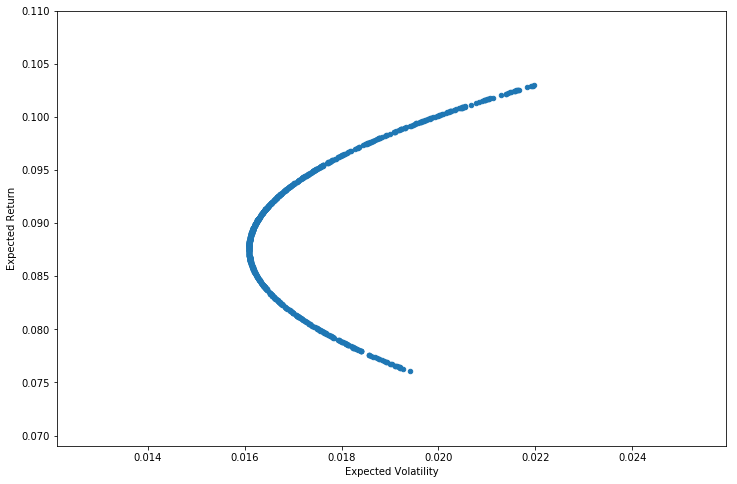

In [46]:
portfolios.plot(x='Volatility', y='Returns', kind='scatter', figsize=(12,8))
plt.xlabel('Expected Volatility')
plt.ylabel('Expected Return');